In [19]:
import torch
import matplotlib.pyplot as plt
from GWD_data import WheatDataset
from config import config
from matplotlib.patches import Rectangle

In [2]:
conf = config()
conf.DEVICE = torch.device('cuda:0')
Wheat_dataset = WheatDataset(conf)

In [7]:
M = torch.load('model/global_wheat_epoch_0_loss_0.7703235149383545.model')
M.to(torch.device('cpu'))
M.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [8]:
images, targets = [], []
for i in range(5):
    img, tgt = Wheat_dataset[i*100]
    images.append(img)
    targets.append(tgt)

In [9]:
r = M([torch.tensor(image) for image in images])

..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [21]:
def plot_boxes(image, boxes):
    plt.imshow(image)
    for box in boxes:
        rect = Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
        plt.axes().add_patch(rect)
    plt.show()

In [30]:
i=1

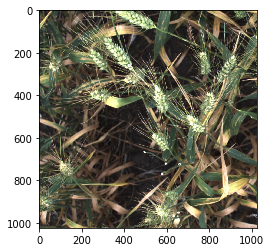

In [31]:
plt.imshow(np.moveaxis(images[i], 0, -1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


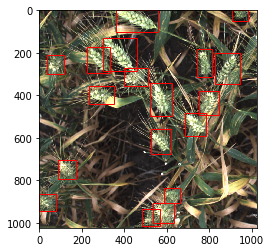

In [36]:
plot_boxes(np.moveaxis(images[i], 0, -1), r[i]['boxes'].detach().numpy()[:18])

In [34]:
r[i]['scores']

tensor([0.9887, 0.9809, 0.9782, 0.9770, 0.9770, 0.9752, 0.9745, 0.9721, 0.9711,
        0.9572, 0.9486, 0.9469, 0.9386, 0.9346, 0.9331, 0.8713, 0.8526, 0.7018,
        0.6650, 0.3258, 0.2266, 0.2215, 0.2211, 0.2035, 0.1682, 0.1643, 0.1600,
        0.1455, 0.1451, 0.1202, 0.1076, 0.0974, 0.0824, 0.0805, 0.0763, 0.0694,
        0.0691, 0.0642, 0.0639, 0.0568], grad_fn=<IndexBackward>)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


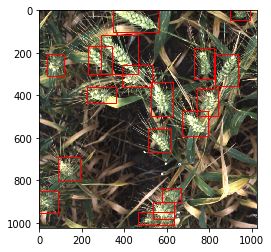

In [35]:
plot_boxes(np.moveaxis(images[i], 0, -1), targets[i]['boxes'])